In [1]:
# JM: Apr 10 23
# quick code for doing the delay oscillator equation (Vallis Eq. 22.97)

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

implied shift index is delta / dt = 80.000000

NOTE: probably want delta / dt to be an integer, otherwise index shifts are going to be off


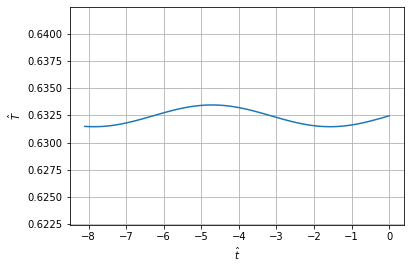

In [2]:
# parameters
dt = 0.1
alpha = 0.6
delta = 8.0

print(f"implied shift index is delta / dt = {delta / dt:.6f}")
print("")
print(f"NOTE: probably want delta / dt to be an integer, otherwise index shifts are going to be off")

# create time array going from -delta-dt to tf for creating initial conditions
# (just 1d array, so whatever with memory, but be careful...)

tf = 200
t_vec = np.arange(-delta-dt, tf, dt)
T_b = np.sqrt(1.0 - alpha)

# initialise an array to dump outputs in, and dump in the initial conditions
T = np.zeros(len(t_vec))
T[t_vec <= 0] = T_b + 0.001 * np.sin(t_vec[t_vec <= 0])

plt.plot(t_vec[t_vec <= 0], T[t_vec <= 0])
plt.xlabel(r"$\hat{t}$")
plt.ylabel(r"$\hat{T}$")
plt.ylim([T_b - 0.01, T_b + 0.01])
plt.grid()

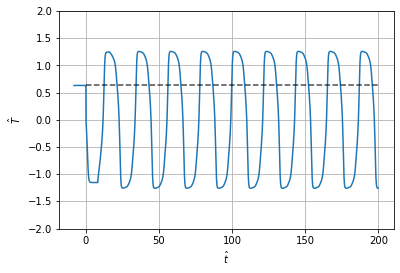

In [3]:
# do the AB2 time-stepping

delta_shift = int(delta / dt)  # need this to be an integer otherwise python complains

for i in range(len(t_vec)-1):
    # only do stuff if t >= 0
    if t_vec[i] > 0:
        T[i+1] = T[i] + dt * ( 
             3.0/2.0 * (T[i  ] - alpha * T[i-delta_shift  ] - T[i  ]**3)
            -1.0/2.0 * (T[i-1] - alpha * T[i-delta_shift-1] - T[i-1]**3)
        )
        
# quick plot
plt.plot(t_vec, T)
plt.plot([0, tf], [T_b, T_b], 'k--', alpha=0.7)
plt.xlabel(r"$\hat{t}$")
plt.ylabel(r"$\hat{T}$")
plt.ylim([-2, 2])
plt.grid()

In [4]:
# wrap this into a subroutine and do some subplots

def dde_ab2(delta, alpha, dt=0.1, tf=200):

    # create time array going from -delta-dt to tf for creating initial conditions
    # (just 1d array, so whatever with memory, but be careful...)
    t_vec = np.arange(-delta-dt, tf, dt)
    T_b = np.sqrt(1.0 - alpha)

    # initialise an array to dump outputs in, and dump in the initial conditions
    T = np.zeros(len(t_vec))
    T[t_vec <= 0] = T_b + 0.001 * np.sin(t_vec[t_vec <= 0])

    delta_shift = int(delta / dt)  # need this to be an integer otherwise python complains

    for i in range(len(t_vec)-1):
        # only do stuff if t >= 0
        if t_vec[i] >= 0:
            T[i+1] = T[i] + dt * ( 
                 3.0/2.0 * (T[i  ] - alpha * T[i-delta_shift  ] - T[i  ]**3)
                -1.0/2.0 * (T[i-1] - alpha * T[i-delta_shift-1] - T[i-1]**3)
            )
    
    return t_vec, T

(-2.0, 2.0)

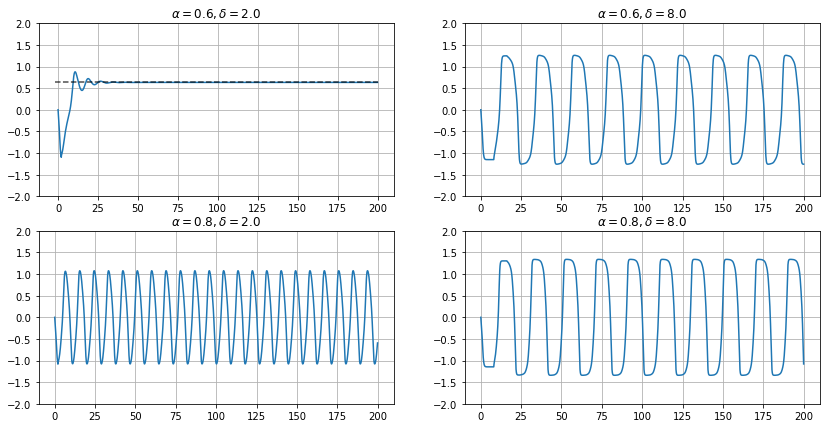

In [5]:
# plot out over a choice of parameters (cf. Vallis Fig 22.21)

fig, axes = plt.subplots(figsize=(14, 7), nrows=2, ncols=2)

alpha, delta = 0.6, 2.0
t_vec, T = dde_ab2(delta, alpha)
axes[0, 0].plot(t_vec[t_vec >= 0], T[t_vec >= 0])
axes[0, 0].plot([t_vec[0], t_vec[-1]], [np.sqrt(1.0 - alpha), np.sqrt(1.0 - alpha)], "k--", alpha=0.7)
axes[0, 0].grid()
axes[0, 0].set_title(f'$\\alpha = {alpha:.1f}, \\delta = {delta:.1f}$')
axes[0, 0].set_ylim([-2, 2])

alpha, delta = 0.6, 8.0
t_vec, T = dde_ab2(delta, alpha)
axes[0, 1].plot(t_vec[t_vec >= 0], T[t_vec >= 0])
axes[0, 1].grid()
axes[0, 1].set_title(f'$\\alpha = {alpha:.1f}, \\delta = {delta:.1f}$')
axes[0, 1].set_ylim([-2, 2])

alpha, delta = 0.8, 2.0
t_vec, T = dde_ab2(delta, alpha)
axes[1, 0].plot(t_vec[t_vec >= 0], T[t_vec >= 0])
axes[1, 0].grid()
axes[1, 0].set_title(f'$\\alpha = {alpha:.1f}, \\delta = {delta:.1f}$')
axes[1, 0].set_ylim([-2, 2])

alpha, delta = 0.8, 8.0
t_vec, T = dde_ab2(delta, alpha)
axes[1, 1].plot(t_vec[t_vec >= 0], T[t_vec >= 0])
axes[1, 1].grid()
axes[1, 1].set_title(f'$\\alpha = {alpha:.1f}, \\delta = {delta:.1f}$')
axes[1, 1].set_ylim([-2, 2])

/home/jclmak/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-6-53616ae899d3>:26: RuntimeWarning: invalid value encountered in arccos
  plt.plot((  np.arccos( (3.0 * alpha_vec - 2.0) / alpha_vec )
<ipython-input-6-53616ae899d3>:27: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(alpha_vec ** 2 - (3.0 * alpha_vec - 2.0) ** 2)), alpha_vec,
<ipython-input-6-53616ae899d3>:26: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot((  np.arccos( (3.0 * alpha_vec - 2.0) / alpha_vec )
<ipython-input-6-53616ae899d3>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot((  np.arccos( (3.0 * alpha_vec - 2.0) / alpha_vec )


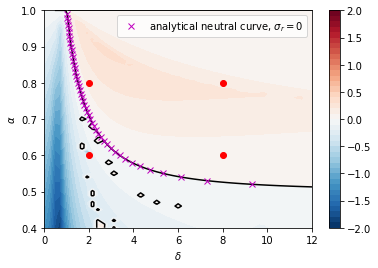

In [6]:
# brute force root-finding to plot regime diagram

def func(x, *args):
    delta, alpha = args
    return [x[0] - (3.0 * alpha - 2.0 - alpha * np.exp(-x[0] * delta) * np.cos(x[1] * delta)),
            x[1] - (                  + alpha * np.exp(-x[0] * delta) * np.sin(x[1] * delta))]

# brute force solve through a loop
delta_vec = np.linspace(0, 12, 51)
alpha_vec = np.linspace(0.4, 1.0, 61)

sigma_r = np.zeros((len(alpha_vec), len(delta_vec)))
sigma_i = np.zeros((len(alpha_vec), len(delta_vec)))
                   
# args = (delta, alpha), returns (sigma_r, sigma_i)

for j in range(len(alpha_vec)):
    for i in range(len(delta_vec)):
        root = optimize.fsolve(func, [0.1, 0.1], args=(delta_vec[i], alpha_vec[j]))
        sigma_r[j, i], sigma_i[j, i] = root[0], root[1]
        
plt.contourf(delta_vec, alpha_vec, sigma_r, np.linspace(-2, 2, 41), cmap="RdBu_r")
plt.colorbar()
plt.contour(delta_vec, alpha_vec, sigma_r, levels=[0], colors='k')

plt.plot((  np.arccos( (3.0 * alpha_vec - 2.0) / alpha_vec ) 
          / np.sqrt(alpha_vec ** 2 - (3.0 * alpha_vec - 2.0) ** 2)), alpha_vec,
         'mx', label="analytical neutral curve, $\sigma_r = 0$")
plt.xlim([delta_vec[0], delta_vec[-1]])
plt.xlabel(r"$\delta$")
plt.ylabel(r"$\alpha$")
plt.legend()
plt.plot(2.0, 0.6, 'ro')
plt.plot(8.0, 0.6, 'ro')
plt.plot(2.0, 0.8, 'ro')
plt.plot(8.0, 0.8, 'ro')